In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

In [2]:
data = pd.read_csv('data_cleaned.csv',keep_default_na=False)
data.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region,tokenized_title,title_without_stopwords,title_cleaned
0,aaOB-ErYq6Y,2017-11-14,waymo's fully self-driving cars are here,Waymo,2017-11-07,28,16:03:12,"self-driving car|""waymo""|""self-driving""|""drive...",665232,6485,...,https://i.ytimg.com/vi/aaOB-ErYq6Y/default.jpg,False,False,False,"Waymo, which started as the Google self-drivin...",Science & Technology,Great Britan,"['waymo', ""'s"", 'fully', 'self-driving', 'cars...","['waymo', ""'s"", 'fully', 'self-driving', 'cars']",waymo fully cars
1,XPrHD-7jjUs,2018-02-12,this hidden 300 foot stretch of the berlin wal...,VICE News,2018-02-05,25,17:15:48,"300 foot|""VICE News Tonight""|""VICE News""|""Berl...",52637,1005,...,https://i.ytimg.com/vi/XPrHD-7jjUs/default.jpg,False,False,False,The Berlin Wall was the ultimate symbol of the...,News & Politics,Great Britan,"['this', 'hidden', '300', 'foot', 'stretch', '...","['hidden', '300', 'foot', 'stretch', 'berlin',...",hidden foot stretch berlin wall still standing...
2,UOgNUOKYXiA,2018-05-13,durga | full ep 1068 | 11th may 2018 | odia se...,Tarang TV,2018-05-12,24,06:00:01,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",87291,340,...,https://i.ytimg.com/vi/UOgNUOKYXiA/default.jpg,False,False,False,Durga: Story of a revengeful daughter who ente...,Entertainment,India,"['durga', '|', 'full', 'ep', '1068', '|', '11t...","['durga', '|', 'full', 'ep', '1068', '|', '11t...",durga full ep may odia serial tarangtv
3,W1LO7Zk_38o,2018-02-01,ðð«ð¡ðððððð ððð®ð¡ â«ððð ðððð¦ð...,Sasha Sotnik,2018-01-29,25,16:00:05,"Ð¶Ð¸Ð»ÑÐµ|""Ð²ÑÑÐµÐ»ÐµÐ½Ð¸Ðµ""|""Ð°Ð²Ð°ÑÐ¸Ð¹Ð...",139389,11135,...,https://i.ytimg.com/vi/W1LO7Zk_38o/default.jpg,False,False,False,ÐÑÐ°Ð¶Ð´Ð°Ð½Ðµ Ð Ð¾ÑÑÐ¸Ð¸ Ð¿ÑÐ¾Ð´Ð¾Ð»Ð¶Ð°...,News & Politics,Russia,"['ð\x92ð', '«', 'ð¡ð\x95ð\x9bð\x95ð\x9dð\x98ð\...","['ð\x92ð', '«', 'ð¡ð\x95ð\x9bð\x95ð\x9dð\x98ð\...",â
4,BmEvz7tkoks,2018-01-14,"amlo canta las maã±anitas a su esposa, por su ...",Viral Pancho,2018-01-13,27,23:36:07,"amlo|""pena nieto""|""elecciones 2018""|""politica ...",57778,3689,...,https://i.ytimg.com/vi/BmEvz7tkoks/default.jpg,False,False,False,Mexico va a votar por amlo por las propuestas ...,Education,Mexico,"['amlo', 'canta', 'las', 'maã±anitas', 'a', 's...","['amlo', 'canta', 'maã±anitas', 'esposa', ',',...",amlo canta esposa humildad voto amlo


# GLOBAL TOP 10 WORDS IN TITLES

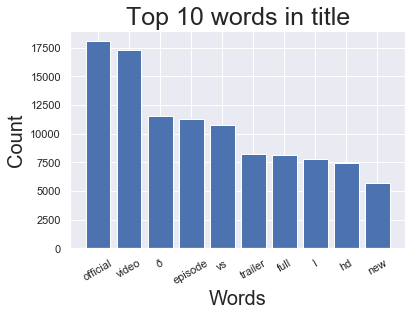

In [3]:
from collections import Counter
fdist = Counter(" ".join(data["title_cleaned"]).split()).most_common(10)
plt.bar(*zip(*fdist))
plt.title("Top 10 words in title",fontsize = 25)
plt.xlabel('Words' , fontsize=20)
plt.ylabel('Count' , fontsize=20)
plt.xticks(rotation = 30)
plt.show()

## Word Cloud of Top 10 Words in Title

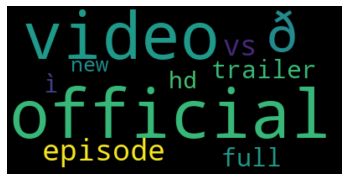

In [40]:
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict(fdist))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Cloud of Top 100 Words in Title

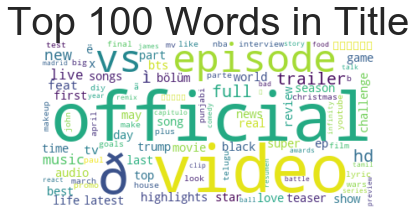

In [35]:
from collections import Counter
text = Counter(" ".join(data["title_cleaned"]).split()).most_common(100)

from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=dict(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 100 Words in Title",fontsize=40)
plt.show()

# TOP 10 Words in Titles Country-Wise

In [11]:
def top10(select,i):
    from collections import Counter
    fdist = Counter(" ".join(select["title_cleaned"]).split()).most_common(10)
    plt.bar(*zip(*fdist))
    plt.title("Top 10 words in title in " + i,fontsize = 25)
    plt.xlabel('Words' , fontsize=20)
    plt.ylabel('Count' , fontsize=20)
    plt.xticks(rotation = 30)
    plt.show()

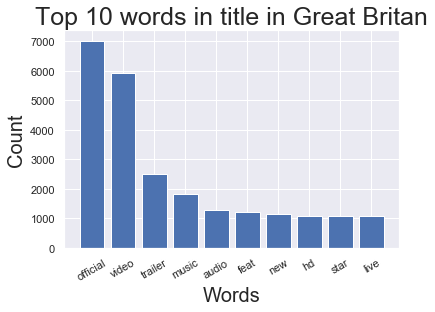

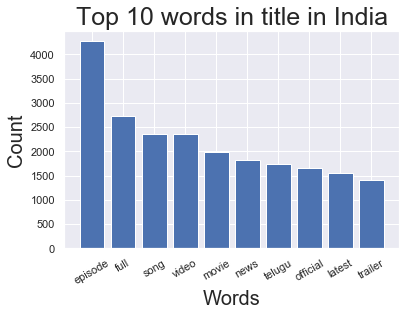

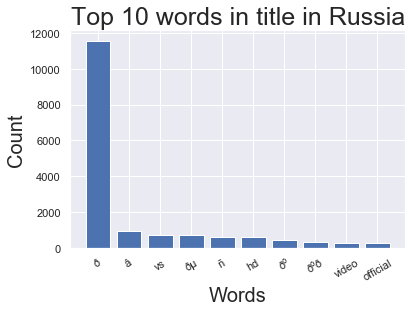

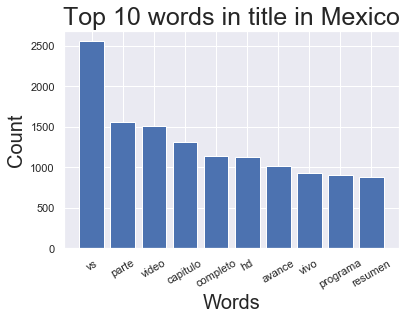

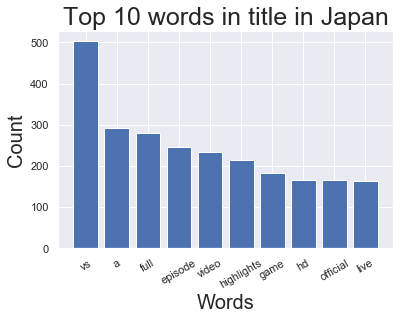

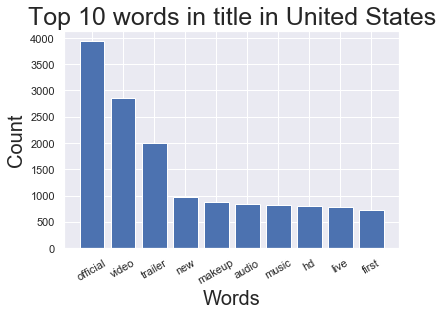

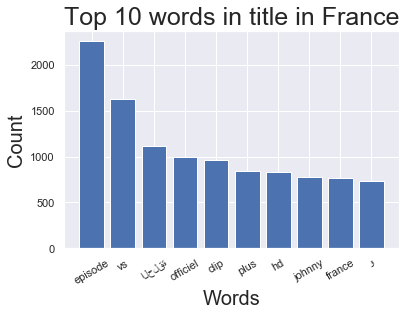

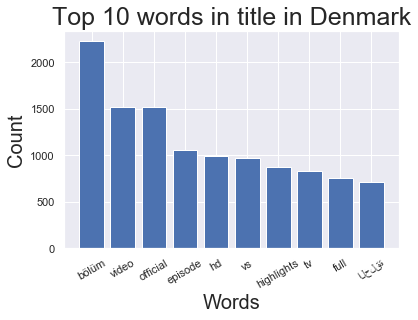

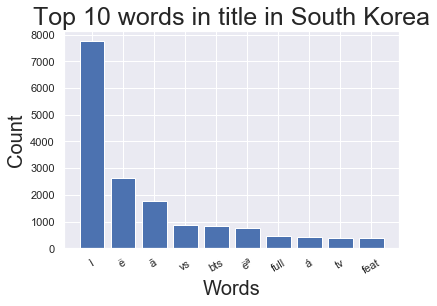

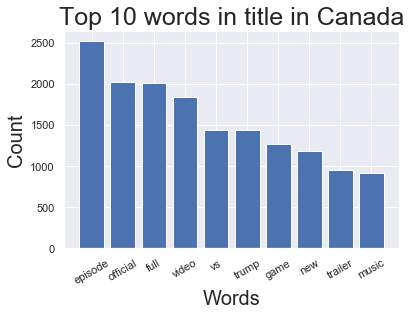

In [12]:
countries = data['region'].unique()
for i in countries:
    select = data.loc[data['region']==i] #Selects all rows of a particular country
    top10(select,i)

# GLOBAL TOP 10 WORDS IN TAGS

In [5]:
data['tag_counts'] = data['tags'].str.split("|").apply(len)
rel_col = ['video_id','views','tag_counts','tags','title']
df = data[rel_col].groupby(['video_id'])
data_t = [] 

# Editing the data such that we are able to loop through each tag in each column
for vid_id,rows in df:
    #days_trended = len(rows)
    data_t.append([vid_id,rows['title'].values[0],rows['tags'].values[0].split("|"),rows['tag_counts'].values[0]])

# Creating new dataframe with the following columns
df = pd.DataFrame(data_t, columns = ['Video ID', 'Title','Tags','Tag Counts'])
dic_freq = {}
# Looping through the rows
for index, row in df.iterrows():
    # Looping through each tag
    for item in row['Tags']:
        if item in dic_freq:
            dic_freq[item] = dic_freq[item] + 1
        else:
            dic_freq[item] = 1

In [6]:
import operator
sorted_d = dict( sorted(dic_freq.items(), key=operator.itemgetter(1),reverse=True))

In [7]:
import itertools
out = dict(itertools.islice(sorted_d.items(), 11))
out_ = dict(itertools.islice(sorted_d.items(), 100))

out_key = []
out_value = []
for item in out:
    out_key.append(item)
    out_value.append(out[item])

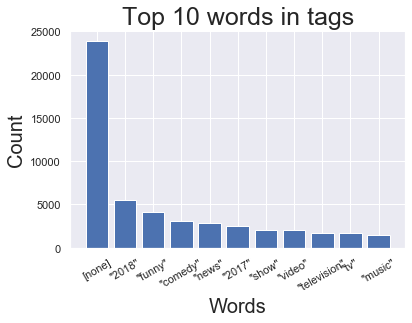

In [8]:
plt.bar(out_key,out_value)
plt.title("Top 10 words in tags" ,fontsize = 25)
plt.xlabel('Words' , fontsize=20)
plt.ylabel('Count' , fontsize=20)
plt.xticks(rotation = 30)
plt.show()

## Word Cloud of Top 100 tags

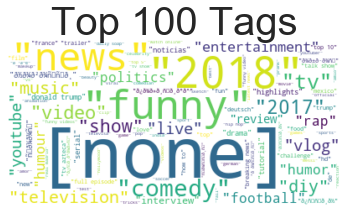

In [11]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=dict(out_) )
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 100 Tags",fontsize=40)
plt.show()

## Title Length vs No. of Views

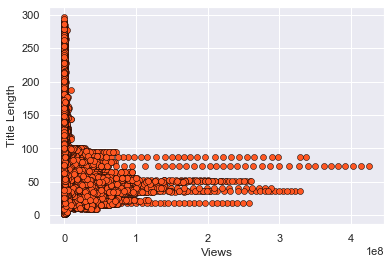

In [32]:
data["title_length"] = data["title"].apply(lambda x: len(x))
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
fig, ax = plt.subplots()
_ = ax.scatter(x=data['views'], y=data['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")